BU PROJEDE APPLE HİSSE SENEDİNİN 21/09/2024 - 21/09/2025 TARHİLERİ ARASINDAKİ KAPANIŞ FİYATLARI İLE BİR TIMESERIES MODELİ OLUŞTURUP GELECEK 10 GÜNÜN KAPANIŞ FİYAT VERİLERİNİ TAHMİN ETMEYE ÇALIŞACAĞIZ. (HAFTA SONLARI BORSA KAPALI OLDUĞU İÇİN TARİHLERİN BAŞLANGICI FARKLILIK GÖSTEREBİLİYOR.)

In [42]:
#GEREKLİ KÜTÜPHANELER İMPORT EDİLİYOR.
import yfinance
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt

In [43]:
#BURADA yfinance kütüphanesine vereceğimiz parametreleri başlangıç ve bitiş tarihlerini yazıyoruz. 
today = date.today()

end_day = today.strftime("%Y-%m-%d")

d1 = date.today() - timedelta(days=365)
start_day = d1.strftime("%Y-%m-%d")

In [44]:
#apple verilerini indiriyoruz.
data = yf.download('AAPL', 
                      start=start_day, 
                      end=end_day, 
                      progress=False,
                      threads=False)

C:\Users\PC\AppData\Local\Temp\ipykernel_6656\1447076370.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL',


In [45]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-09-23,225.420883,228.387074,224.763937,226.286848,54146000
2024-09-24,226.316727,228.287565,224.684324,227.590796,43556100
2024-09-25,225.321335,226.237071,222.982230,223.888003,42308700
2024-09-26,226.466019,227.441475,224.365793,226.247037,36636700
2024-09-27,226.734756,228.456753,226.247036,227.401666,34026000


In [46]:
#sonrasında kullanabilmek için csv olarak kaydediyoruz.
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.to_csv('apple_1year2.csv')
print(data.tail())

Price        Date        Open        High         Low       Close     Volume
Ticker                   AAPL        AAPL        AAPL        AAPL       AAPL
244    2025-09-15  237.000000  238.190002  235.029999  236.699997   42699500
245    2025-09-16  237.179993  241.220001  236.320007  238.149994   63421100
246    2025-09-17  238.970001  240.100006  237.729996  238.990005   46508000
247    2025-09-18  239.970001  241.199997  236.649994  237.880005   44249600
248    2025-09-19  241.229996  246.300003  240.210007  245.500000  163470300


BURAYA KADAR OLAN KISMI DAHA ÖNCESİNDE ÇALIŞTIRDIĞIM İÇİN TEKRAR ÇALIŞTIRMIYORUM. KAYDETMİŞ OLDUĞUM CSV DOSYASINI OKUMAKLA YETİNİYORUM.

In [47]:
data = pd.read_csv('apple_1year2.csv')

In [48]:
data = data[["Date", "Open", "High", "Low", "Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

In [49]:
data.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]

In [50]:
data.head()

,Date,Open,High,Low,Close,Volume
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
1,2024-09-23,226.2868480598011,228.38707413181643,224.7639369712135,225.42088317871094,54146000
2,2024-09-24,227.59079599939528,228.2875654709032,224.68432442569429,226.3167266845703,43556100
3,2024-09-25,223.88800321688734,226.23707111110926,222.9822303399746,225.3213348388672,42308700
4,2024-09-26,226.24703661091274,227.44147457763864,224.36579263659118,226.4660186767578,36636700


In [51]:
data = data.drop(0)
data.reset_index(drop=True, inplace=True)

In [52]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2024-09-23,226.2868480598011,228.38707413181643,224.7639369712135,225.42088317871094,54146000
1,2024-09-24,227.59079599939528,228.2875654709032,224.68432442569429,226.3167266845703,43556100
2,2024-09-25,223.88800321688734,226.23707111110926,222.9822303399746,225.3213348388672,42308700
3,2024-09-26,226.24703661091274,227.44147457763864,224.36579263659118,226.4660186767578,36636700
4,2024-09-27,227.40166606122023,228.45675318264773,226.24703611440785,226.73475646972656,34026000


In [53]:
#MEVCUT DATADAN SADECE TARİH VE KAPANIŞ SÜTUNLARINI ALIYORUM.
new_data = data[['Date','Close']]

In [54]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    249 non-null    object
 1   Close   249 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [55]:
# Tarihleri datetime'a çeviriyoruz ve kapanış fiyatlarınıda floata dönüştürüyoruz.
new_data['Date'] = pd.to_datetime(new_data['Date'])
new_data = new_data.sort_values('Date')
new_data['Close'] = new_data['Close'].astype('float64')
new_data.set_index('Date', inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_6656\2929218944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Date'] = pd.to_datetime(new_data['Date'])


In [56]:
new_data.head()

,Close
Date,
2024-09-23,225.420883
2024-09-24,226.316727
2024-09-25,225.321335
2024-09-26,226.466019
2024-09-27,226.734756


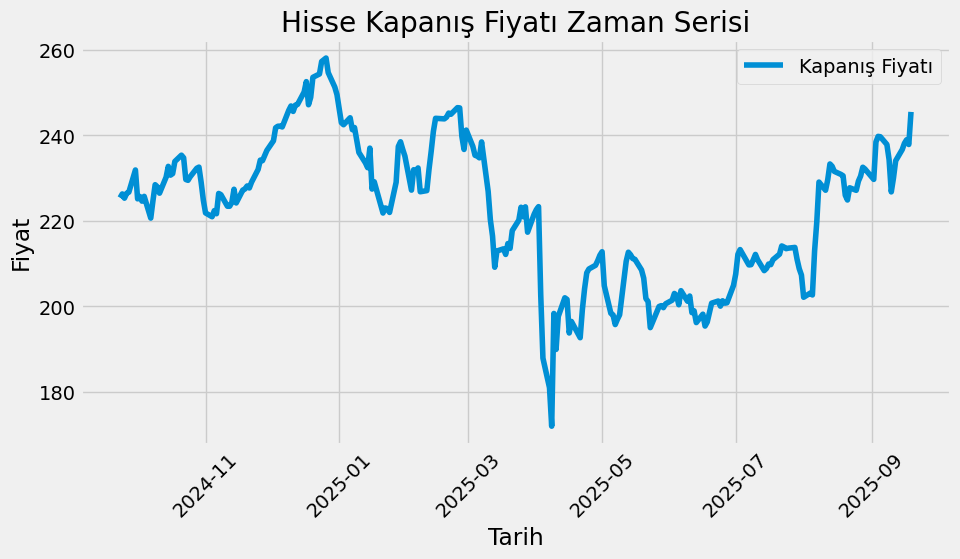

In [57]:
#AŞAĞIDA TARİH VE KAPANIŞ VERİLERİNİ GÖRSELLEŞTİRİYORUZ.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.plot(new_data['Close'], label='Kapanış Fiyatı')

plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.title("Hisse Kapanış Fiyatı Zaman Serisi")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [58]:
#pip install statsmodels

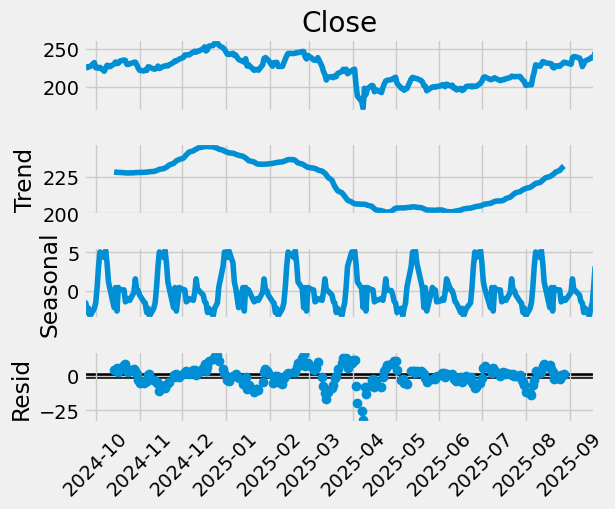

In [59]:
#BU KOD İLE ELİMİZDEKİ VERİNİNİ SEZON İÇERİİSNDE DEĞİŞİM GÖSTERİP GÖSTERMEDİĞİNİ VEYA BELİRLİ BİR TRENDE SAHİP OLUP OLMADIĞINI GÖREBİLİYORUZ.
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(new_data['Close'], model='additive', period=30) # örnek: aylık döngü
fig = result.plot()
plt.xticks(rotation = 45)
plt.show()

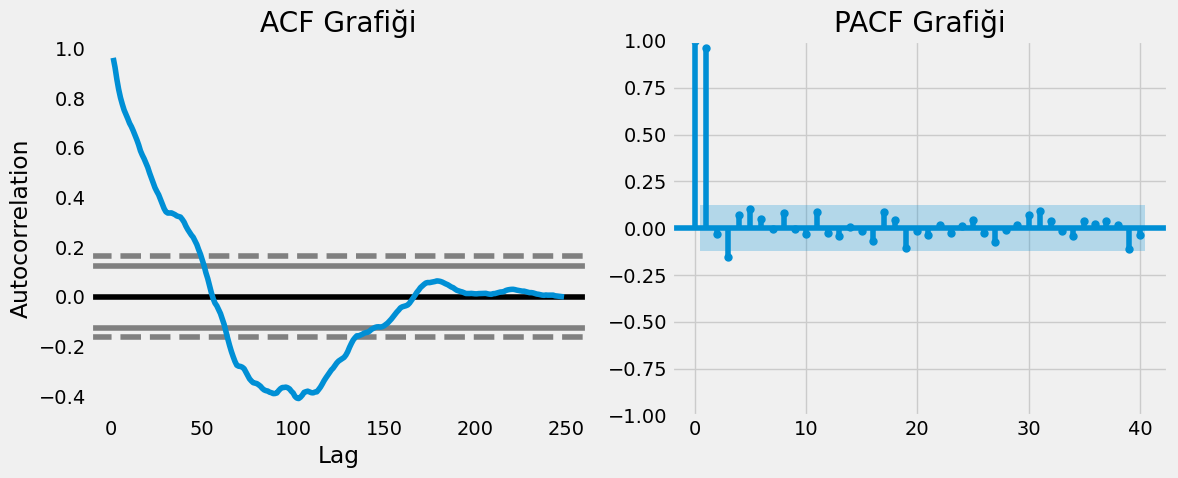

In [60]:
#BURADA EN UYGUN P VE Q DEĞERLERİNİ SEÇMEK İÇNİ GRAFİK ÇİZİYORUZ.
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

#p için
plt.subplot(121)
pd.plotting.autocorrelation_plot(new_data["Close"], ax=plt.gca())
plt.title("ACF Grafiği")

#Q için
plt.subplot(122)
plot_pacf(new_data['Close'], lags=40, ax=plt.gca())
plt.title("PACF Grafiği")

plt.tight_layout()
plt.show()

# P DEĞERİ İÇİN GRAFİKTE SIFIRIN ALTINA DÜŞEN ACF GRAFİĞİNDEKİ ÇİZGİNİN KAÇINCI SÜTUNDA OLDUĞUNA BAKIYORUZ
# Q DEĞERİ PACF GRAİFİĞİNDE NE ZAMAN TARALI ALANDA DEVAM ETTİĞİNE BAKIYORUZ (2.SÜTUNDAN SONRA O ZAMAN DEĞER 2)


In [61]:
#ELİMİZDEKİ MODELDE BELİRLİ SEZONLARDA İNİŞ VE ÇIKIŞLARIN OLDUĞUNU GÖRÜYORUZ BU NEDENLE SARIMA MODELİNİ EĞİTİYORUZ.
#P DEĞERİ İLE MODELİ EĞİTİRKEN GEÇMİŞ KAÇ GÜNÜN VERİLERİNİ DİKKATE ALACAĞIMIZI SEÇİYORUZ. 
#D DEĞERİ İÇİN EĞER 1 DERSEK VERİNİN DEĞERLERİ ARASINDAKİ FARKI ALIR. 2 DERSEK ALDIĞI FARKLARINDA FARKINI ALIR. MAKSAT VERİYİ DURAĞANLAŞTITMAK.
#Q DEĞERİ İSE VERİ İÇERİSİNDEKİ GEÇMİŞ HATALARIN KAÇ TANESİNİ DİKKATE ALSIN. 2 DERSEK GEÇMİŞ HATALARDA 2 TANESİNİ DİKKATE ALIR.
p, d, q = 4, 1, 2
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(new_data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\ProgramData\anaconda3\envs\nlp-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\envs\nlp-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\envs\nlp-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\envs\nlp-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  249
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -687.599
Date:                            Sun, 21 Sep 2025   AIC                           1401.197
Time:                                    14:24:30   BIC                           1446.227
Sample:                                         0   HQIC                          1419.349
                                            - 249                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6041    522.436      0.001      0.999   -1023.351    1024.559
ar.L2          0.2243    380.797   

In [62]:
#DATANIN ÜZERİNE 10 DAHA EKLEYEREK İLERİ TARİHLİ 10 GÜNÜ TAHMİN EDİYORUZ.
pred = model.get_forecast(steps=10)   # steps=10 → 10 adım sonrasını tahmin et

# Tahmin değerleri
pred_mean = pred.predicted_mean

C:\ProgramData\anaconda3\envs\nlp-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\envs\nlp-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [63]:
future_dates = pd.date_range(start=new_data.index[-1] + pd.Timedelta(days=1), periods=10, freq='D')

In [64]:
pred_mean.index = future_dates

In [65]:
print(pred_mean)

2025-09-20    244.083724
2025-09-21    244.182730
2025-09-22    242.594085
2025-09-23    242.392271
2025-09-24    240.654379
2025-09-25    242.153339
2025-09-26    241.573533
2025-09-27    243.429190
2025-09-28    243.685549
2025-09-29    243.251272
Freq: D, Name: predicted_mean, dtype: float64


PROJE SONUCUNDA ÖNÜMÜZDEKİ 10 GÜNLÜK APPLE HİSSE FİYATLARINI TAHMİN ETTİK.

In [66]:
# Eğittiğimiz modeli kaydediyoruz.
import joblib
joblib.dump(model, "apple_model.pkl")

['apple_model.pkl']